# Intensity Level Transformations 

## Import Libraries 

In [8]:
import cv2
## import other needed libraries ##
##... CODE HERE ...##
from matplotlib import pyplot as plt
import numpy as np

## Read Images

In [9]:
## read all the images ##
##... CODE HERE ...##
image_1 = cv2.imread("Team_15_Image_01.png")

image_2 = cv2.imread("Team_15_Image_02.jpg")

## Show Images 

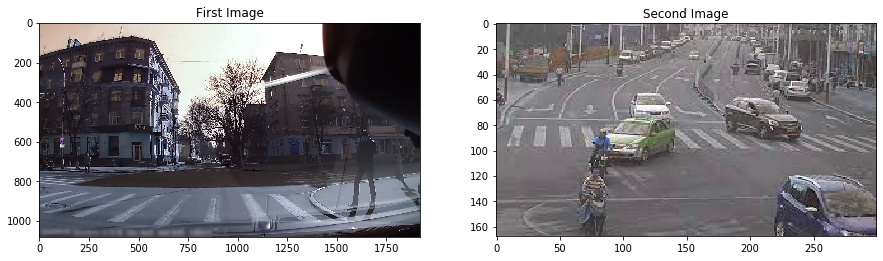

In [10]:
## show all images ##
##... CODE HERE ...##
## show all images ##
##... CODE HERE ...##
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(image_1);
ax1.set_title('First Image');
ax2.imshow(image_2);
ax2.set_title('Second Image');

In [11]:
image_1.shape

(1080, 1920, 3)

## Transform from RGB to Grayscale and from Grayscale to Binary 

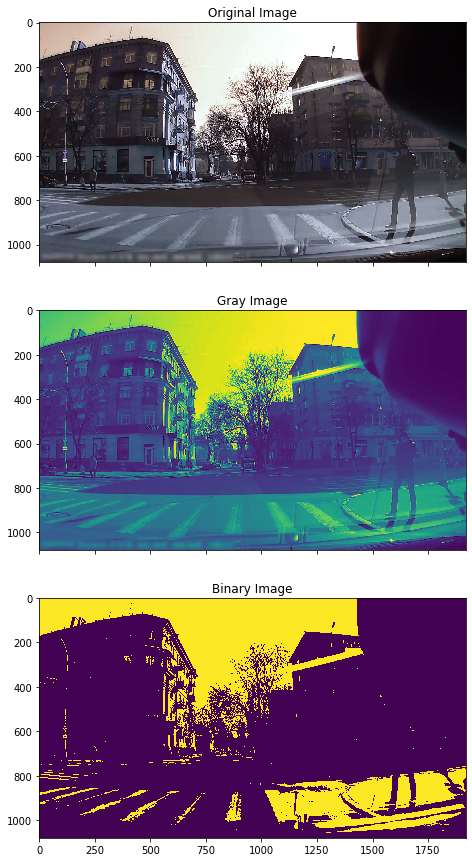

In [16]:
## transform the RGB image to grayscale image ##
##... CODE HERE ...##
img_gray=cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
## transform the grayscale image to binary image with two different threshold values ##
##... CODE HERE ...##
(thresh, img2_bw) = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# (thresh, img1_bw) = cv2.threshold(img_gray, 90, 240, cv2.THRESH_BINARY) # Second one

## show the RGB, grayscale and binary image ##
##... CODE HERE ...##
fig, axs = plt.subplots(3, figsize = (15,15),sharex=True, sharey=True)
# fig.suptitle('Sharing both axes')
axs[0].imshow(image_1);
axs[0].set_title("Original Image");
axs[1].imshow(img_gray);
axs[1].set_title("Gray Image");
axs[2].imshow(img2_bw);
axs[2].set_title("Binary Image");
## save the grayscale and binary images ##
##... CODE HERE ...##
cv2.imwrite("Gray.png",img_gray);
cv2.imwrite("Binary.png",img2_bw);

## Histogram Function

In [30]:
## define the histogram function ##
def hist_func(img_in,img_out,name,name_1,name_2):
    ##... CODE HERE ...##
    hist_in = cv2.calcHist([img_in],[0],None,[255],[0,256])
    hist_out = cv2.calcHist([img_out],[0],None,[255],[0,256])    
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(hist_in,linewidth=2)
    plt.plot(hist_out,linewidth=2)
    plt.grid()    
    plt.legend([name_1, name_2],fontsize='x-large')
    plt.xlim([0,270])
    #plt.ylim([0,60000])
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('Input Intensity (I)',size=20)
    plt.ylabel('Count',size=20)    
#     plt.savefig(name+'.png')
    

## Show Histogram

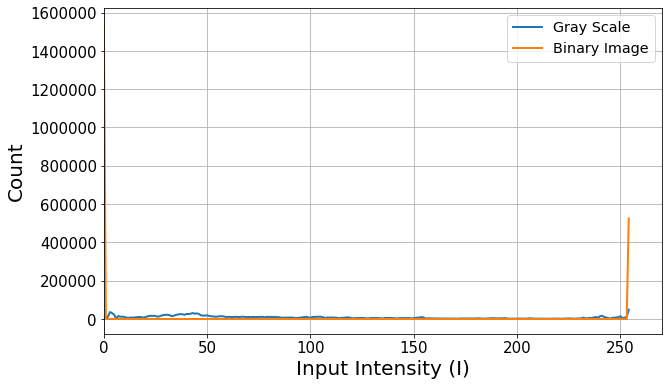

In [31]:
## show the histogram of the grayscale image, compared to the binary image ##
##... CODE HERE ...##
hist_func(img_gray, img2_bw,'',"Gray Scale","Binary Image")
## save the histogram outputted ##
##... CODE HERE ...##
plt.savefig("Histo.png")

## Gamma Function 

In [67]:
## define the gamma function ##
def gamma_func(gamma,image):
    ##... CODE HERE ...##
    corrected_image = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
    return corrected_image

## Brighten the Grayscale Image

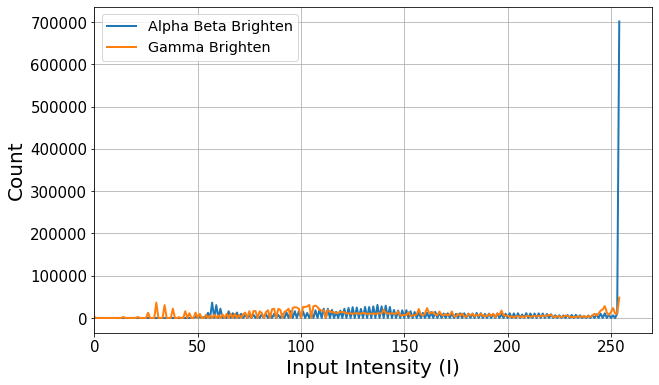

In [78]:
## perform brightening operation on the grayscale image using alpha and beta operations ##
##... CODE HERE ...##
beta_image_Bright=cv2.convertScaleAbs(img_gray, alpha=2, beta=50)

## perform brightening operation on the grayscale image using gamma function ##
##... CODE HERE ...##
gamma_image_Bright = gamma_func(0.5,img_gray)
## show the histogram of both operations compared to each other##
##... CODE HERE ...##
hist_func(beta_image_Bright, gamma_image_Bright,'',"Alpha Beta Brighten" , "Gamma Brighten")
## save the operated images##
##... CODE HERE ...##
cv2.imwrite("AlphaBeta_Brighten.png",beta_image_Bright)
cv2.imwrite("Gamma_Brighten.png",gamma_image_Bright)
## save the histograms outputted ##
##... CODE HERE ...##
plt.savefig("Histo_brighten.png")

## Darken the Grayscale Image

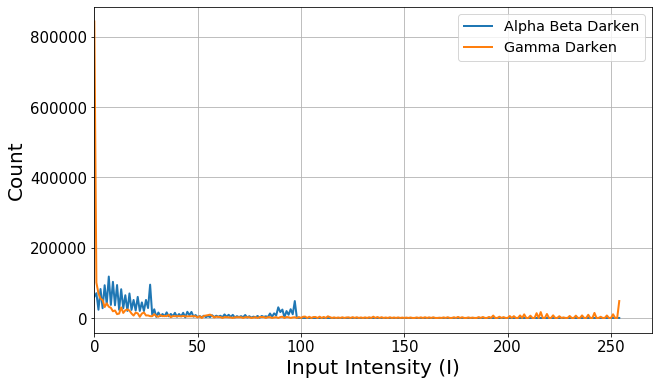

In [80]:
## perform darkening operation on the grayscale image using alpha and beta operations ##
##... CODE HERE ...##
beta_image_dark=cv2.convertScaleAbs(img_gray, alpha=0.5, beta=-30)
## perform darkening operation on the grayscale image using gamma function ##
##... CODE HERE ...##
gamma_image_dark = gamma_func(3,img_gray)

## show the histogram of both operations compared to each other##
##... CODE HERE ...##
hist_func(beta_image_dark, gamma_image_dark,'',"Alpha Beta Darken" , "Gamma Darken")
## save the operated images##
##... CODE HERE ...##
cv2.imwrite("AlphaBeta_Darken.png",beta_image_dark)
cv2.imwrite("Gamma_Darken.png",gamma_image_dark)
## save the histograms outputted ##
##... CODE HERE ...##
plt.savefig("Histo_Darken.png")

# Enhance the Contrast of the Grayscale Image 

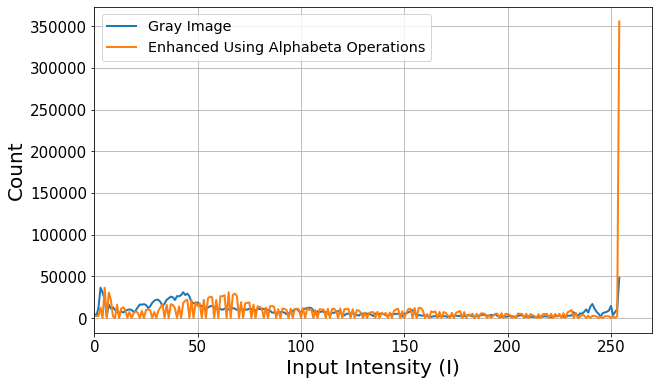

In [82]:
## perform contrast enhancement operation on the grayscale image using alpha and beta operations ##
##... CODE HERE ...##
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

enhanced_alphabeta = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)
## show the histogram of the operation compared to original grayscale image##
##... CODE HERE ...##
hist_func(img_gray,enhanced_alphabeta,"","Gray Image","Enhanced Using Alphabeta Operations")
## save the operated image ##
##... CODE HERE ...##
cv2.imwrite("contrast_enhancement_alphabeta.png",enhanced_alphabeta)
## save the histogram outputted ##
##... CODE HERE ...##
plt.savefig("Contrast_AlphaBeta_Hist.png")

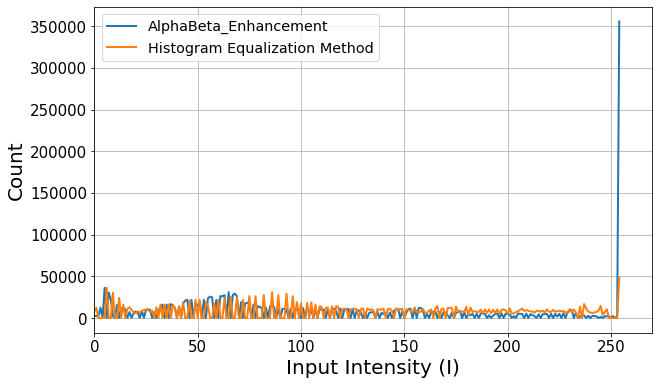

In [83]:
## use histogram equalization to enhance the contrast of the grayscale image##
##... CODE HERE ...##
equalized_image=cv2.equalizeHist(img_gray)
## show the histogram of the operation compared to the previoulsy enhaced image #
##... CODE HERE ...##
hist_func(enhanced_alphabeta,equalized_image,"","AlphaBeta_Enhancement","Histogram Equalization Method")
## save the operated image ##
##... CODE HERE ...##
cv2.imwrite("EqualizedImage.png",equalized_image)
## save the histogram outputted ##
##... CODE HERE ...##
plt.savefig("Hist_Enhancement.png")

## Live Camera

In [84]:
## Capture a video and perform the brightening or darkening operation stated previously on the captured video ##
## ... CODE HERE ...##
cap = cv2.VideoCapture(0)
while True:                                                      # Load the input frame and write output frame.
    ret, img = cap.read()   
    if not ret:                                                  # Check if frame present otherwise he break the while loop
        break
    ## Convert to Grayscale
    frame_read = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gamma_image_dark = gamma_func(3,frame_read)
    plt.grid()
    plt.legend(['Original', 'Darken'],fontsize='x-large')
    plt.xlabel('Frames',size=10)
    plt.savefig('i.png')
    plt.close()
    frame_curve=cv2.imread('i.png')
    cv2.imshow('Original Image', frame_read)
    cv2.imshow('Darken Image', gamma_image_dark)
    
    ## Press the enter key to exit the video
    if cv2.waitKey(1) == 13: #13 Enter Key
        break

cap.release()                                             # For releasing cap and out. 
cv2.destroyAllWindows() 

## Thank you :) 